# Kaggle Data Analysis - Predicting Titanic Survivor

In [116]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn
import math
#from sklearn.model_selection import cross_val_score, train_test_split


### Import Data (& set data type)

In [187]:
df= pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('gender_submission.csv')

In [189]:
display(df2.head(2))

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [256]:
display(df3.head())

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [118]:
#df= pd.read_csv('train.csv', dtype={'Pclass': 'category', 'Sex': 'category',
#                                    'SibSp': 'category', 'Survived' : 'category',
#                                    'Parch': 'category',  
#                                    'Cabin': 'category', 'Embarked': 'category', 'PassengerId' : 'category'})
#df2 = pd.read_csv('test.csv', dtype={'Pclass': 'category', 'Sex': 'category',
#                                    'SibSp': 'category', 
#                                    'Parch': 'category', 
#                                    'Cabin': 'category', 'Embarked': 'category', 'PassengerId' : 'category'})
#df3 = pd.read_csv('gender_submission.csv')

### Correlation Test on categorical data (using chi-square test)

In [119]:
# used binomial proportion difference between male and female's survival rate, to determine if there are significant difference
# of survuval rate between the sexes
n = len(df)
p1 = (len(df[(df['Sex']=='male') & (df['Survived'] == 1)]))/n
q1 = (len(df[(df['Sex']=='male') & (df['Survived'] == 0)]))/n
se1 = (p1*q1)/n

p2 = (len(df[(df['Sex']=='female') & (df['Survived'] == 1)]))/n
q2 = (len(df[(df['Sex']=='female') & (df['Survived'] == 0)]))/n
se2 = (p2*q2)/n

# based in the 95% confidence interval, the hypothesis which survuvla rate is same regardless of sex is denied
SE = math.sqrt(se1+se2)
CI_upper_bound =(p1-p2)+2*SE 
# F test shows that the two groups does not share the smae population variance. thus, the result of t test is in vain
# F and t test both require groups to have similar number of group members (1.5 times at most). When the number of sampple is big
# enough, varience homogenity can be violated(maybe?)
F_test = (se1**2)/(se2**2)
print('Differece of Survival rate:', p1-p2 )
print('Stndard error', SE)
print('confidence interval upper bound', CI_upper_bound)
print('F-test', F_test)


Differece of Survival rate: -0.1391694725028058
Stndard error 0.00993974925241817
confidence interval upper bound -0.11928997399796948
F-test 7.305716616307469


In [120]:
display(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [121]:
# Based on levene's test, whcih teset whether the homogenity of variance( whether smaple groups have same variance)
# leven test is robus to violating normal distribution. and non-equal sample size
# whre there is no siginificant deviation from normal distribution, use bartlett test
dfl1 = df['Survived'][df['Sex']=='male']
dfl2 = df['Survived'][df['Sex']=='female']
dfl1 = np.array(dfl1)
dfl2 = np.array(dfl2)

# Results shows homogenity of variance is violated, thus it is likely that i falsely rejected that survival rate does not differe
# between male and female
stats.levene(dfl1, dfl2)

# Conclusion : when building model, test if it works betttwer without information on 'sex'

LeveneResult(statistic=5.8041006326174953, pvalue=0.016191248809611765)

In [122]:
def chi2_independent_test(df, c1, c2):
    groupsizes = df.groupby([c1, c2]).size()
    groupsizes_reordered = groupsizes.unstack(c1)
    np_array_form = np.array(groupsizes_reordered)
    chi2_test_results = stats.chi2_contingency(np_array_form)
    print(groupsizes_reordered)
    return chi2_test_results

In [123]:
#chi sqaure test for independence gives 4.5e-23 p value. Thus we reject survival is independent of pclass
#for 2x2 proportion problem, use fisher's exact test or chi square independent test
# for 2x2 paired proportion, used matched pair exact test (comparing survival rate before treatment and after treatment)
chi2_independent_test(df, 'Survived', 'Pclass')

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


(102.88898875696056,
 4.5492517112987927e-23,
 2,
 array([[ 133.09090909,   82.90909091],
        [ 113.37373737,   70.62626263],
        [ 302.53535354,  188.46464646]]))

In [124]:
# Embaked place has something to do with survival
chi2_independent_test(df, 'Survived', 'Embarked')

Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


(26.489149839237619,
 1.769922284120912e-06,
 2,
 array([[ 103.7480315,   64.2519685],
        [  47.5511811,   29.4488189],
        [ 397.7007874,  246.2992126]]))

In [125]:
# gender affect survival rate
chi2_independent_test(df, 'Survived', 'Sex')

Survived    0    1
Sex               
female     81  233
male      468  109


(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[ 193.47474747,  120.52525253],
        [ 355.52525253,  221.47474747]]))

### Exploratory Data Analysis (further data preprocessing

In [126]:
# number of siblings(sibsp) and parents&children(parch) are not categorical
df= pd.read_csv('train.csv', dtype={'Pclass': 'category', 'Sex': 'category',
                                    'Survived' : 'category',
                                    'Cabin': 'category', 'Embarked': 'category', 'PassengerId' : 'category'})
df2 = pd.read_csv('test.csv', dtype={'Pclass': 'category', 'Sex': 'category',
                                    'Cabin': 'category', 'Embarked': 'category', 'PassengerId' : 'category'})
df3 = pd.read_csv('gender_submission.csv')

In [127]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [128]:
# excluded id, name, passengerid, survuval rate
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']]

# if use [:, -1], then it return only the values in array form(numpy type)
# df.values return numpy arrays of values
y = df.iloc[:, [-1]]
display(X.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [196]:
df_test = df2.copy()
df_train = df.copy()

# display(include='all') means describe not noly numerical data(whichis default), bult also categorical data
display(df_train.describe(include = 'all'),
      df_test.describe(include='all'))

# the ruslt shows that age, cabin, and embarked categories have missing values. 
# use Multiple Impute of 'facyimpute' package
# based on the described data below, it would be bette to drop the entire 'Cabin' class, and missing values of Embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dahl, Mr. Karl Edwart",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Howard, Mrs. Benjamin (Ellen Truelove Arman)",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [130]:
# drop missing values and 'Cabin' columns and 'Fare' / Drop 'Fare' as it is strongly correlated to Plcass and has lots of outlier
# Pclass = upper, middle, lower class (socio economic status)
df_train = df_train.drop(['PassengerId', 'Name','Cabin', 'Fare', 'Ticket'], axis=1)   # del X['Cabin]

# drop row only whose vlaue is nan in Embarked column
df_train = df_train.dropna(subset=['Embarked'])   # X_filtered = X[np.isfinite(X['Embarked'])]
df_train.describe(include='all')


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,889,889,889,712.000000,889.000000,889.000000,889
unique,2,3,2,NaN,NaN,NaN,3
top,0,3,male,NaN,NaN,NaN,S
freq,549,491,577,NaN,NaN,NaN,644
mean,NaN,NaN,NaN,29.642093,0.524184,0.382452,NaN
std,NaN,NaN,NaN,14.492933,1.103705,0.806761,NaN
min,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,20.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN


In [131]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      0
dtype: int64

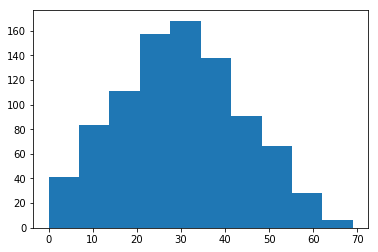

In [132]:
# to fill the missing values of age, i created random numbers using the mean and std calculated above
# np.random.normal( loc = mean, scale = std, size = number of numbers to create + 1)
random_value = np.random.normal(loc = 29.64, scale = 14.49, size = 889)
random_value = pd.DataFrame(random_value).round()

# replace negative values of the random age with 0
random_value[random_value < 0] = np.nan   #df[(df>=-200) & (df<=-100)] = np.nan
random_value = random_value.fillna(0)

plt.hist(random_value)
plt.show()

In [133]:
# filled missing values of the class 'age' with the values of 'random'
df_train =pd.concat([df_train, random_value], axis = 1)
df_train.rename(columns = {0:'random'}, inplace=True)
df_train['Age'] = df_train['Age'].fillna(df_train['random'])

# cannot understand why 2 new null values are created for other classes whcih did not have in X_filtered
df_train = df_train.dropna()

In [136]:
del df_train['random']
display(df_train.head(2))

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1.0,0.0,S
1,1,1,female,38.0,1.0,0.0,C


## Feature Exploration

In [137]:
X_combined = df_train.iloc[:, 1:]
y = df_train.iloc[:, [0]]

In [138]:
Pclass_group = X_combined.groupby('Pclass').size().to_frame(name='counts')
Pclass_group.sort_values('counts', ascending=True)

,counts
Pclass,
2,184
1,213
3,490


In [139]:
SibSp_group = X_combined.groupby('SibSp').size().to_frame(name='counts')
display(SibSp_group.sort_values('counts', ascending=True))

,counts
SibSp,
5.0,5
8.0,7
3.0,16
4.0,18
2.0,28
1.0,209
0.0,604


In [140]:
Parch_group = X_combined.groupby('Parch').size().to_frame(name='counts')
display(Parch_group.sort_values('counts', ascending=True))

,counts
Parch,
6.0,1
4.0,4
3.0,5
5.0,5
2.0,80
1.0,118
0.0,674


In [141]:
Embarked_group = X_combined.groupby('Embarked').size().to_frame(name='counts')
display(Embarked_group.sort_values('counts', ascending=True))

,counts
Embarked,
Q,76
C,167
S,644


In [142]:
#top_gene = g_sort.query('counts > 40')
#top_gene.plot.bar()

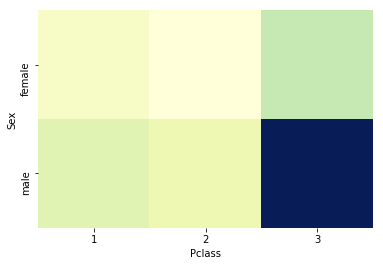

In [143]:
# i wanted to test if there are correlation between social status and gender
gv = X_combined.groupby(['Sex', 'Pclass']).size().to_frame(name='counts')
gv = gv.reset_index().pivot('Sex', 'Pclass', 'counts')
ax = seaborn.heatmap(gv, cbar=False, cmap="YlGnBu")
plt.show()

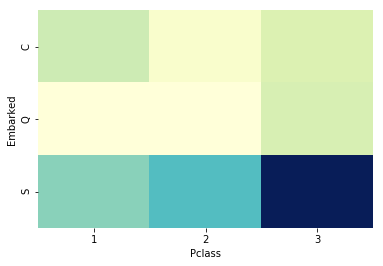

In [144]:
# social stauts of the passengers differe based on where they embarked
gv1 = X_combined.groupby(['Embarked', 'Pclass']).size().to_frame(name='counts')
gv1 = gv1.reset_index().pivot('Embarked', 'Pclass', 'counts')
ax = seaborn.heatmap(gv1, cbar=False, cmap="YlGnBu")
plt.show()

## Applying SVC

In [150]:
Pclass = pd.get_dummies(X_combined['Pclass'], drop_first=True)
Sex = pd.get_dummies(X_combined['Sex'], drop_first=True)
Embarked = pd.get_dummies(X_combined['Embarked'], drop_first=True)

Pclass.columns = ['Pclass2', 'Pclass2']
X_processed = X_combined.iloc[:, [2,3,4]]

In [151]:
display(X_processed.head())

,Age,SibSp,Parch
0,22.0,1.0,0.0
1,38.0,1.0,0.0
2,26.0,0.0,0.0
3,35.0,1.0,0.0
4,35.0,0.0,0.0


In [152]:
X_processed = pd.concat([X_processed, Pclass, Sex, Embarked], axis = 1)
display(X_processed.head(2))

,Age,SibSp,Parch,Pclass2,Pclass2,male,Q,S
0,22.0,1.0,0.0,0,1,1,0,1
1,38.0,1.0,0.0,0,0,0,0,0


In [155]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_recall_curve, roc_auc_score, accuracy_score

X = np.array(X_processed)
y = np.array(y)
y = np.ravel(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
classifierSVC = SVC() 

classifierSVC.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [156]:
#define heatmap to show the varianve of accuracy depending on param_grid values
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
             vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    
    if ax is None:
        ax = plt.gca()
      # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)
 
    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                                img.get_array()):
        
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
             c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [183]:


param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 10]}


In [184]:
# feagure out the best hyper parameter
grid_search = GridSearchCV(SVC(), param_grid, cv = 5)
grid_search.fit(X_train, y_train)
print(format(grid_search.best_estimator_))

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


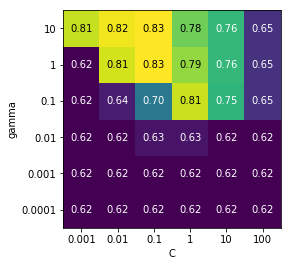

In [185]:
resultsSVC = pd.DataFrame(grid_search.cv_results_)
scoresSVC = np.array(resultsSVC.mean_test_score).reshape(6,6)
%matplotlib inline
heatmap(scoresSVC, xlabel='C', xticklabels=param_grid['C'], ylabel='gamma', yticklabels=param_grid['gamma'], cmap="viridis")

In [186]:
clf = SVC(C = 10, gamma = 0.01)
clf.fit(X_train, y_train)
pred_SVC = clf.predict(X_test)
confusionSVC = confusion_matrix(y_test, pred_SVC)

print('SVC accuracy:', classifierSVC.score(X_test, y_test))
print(format(confusionSVC))

SVC accuracy: 0.752252252252
[[113  21]
 [ 24  64]]


In [234]:
df_test = df2.copy()

df_test = df_test.drop(['PassengerId', 'Name','Cabin', 'Fare', 'Ticket'], axis=1)   # del X['Cabin]
df_test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Embarked     0
dtype: int64

In [235]:
random_value = np.random.normal(loc = 29.64, scale = 14.49, size = 418)
random_value = pd.DataFrame(random_value).round()

# replace negative values of the random age with 0
random_value[random_value < 0] = np.nan   #df[(df>=-200) & (df<=-100)] = np.nan
random_value = random_value.fillna(0)

In [236]:
display(random_value.head(2))

,0
0,39.0
1,39.0


In [237]:
df_test =pd.concat([df_test, random_value], axis = 1)
#df_train = df_train.dropna()
#display(df_test.head(2))
df_test.shape

(418, 7)

In [238]:
df_test.rename(columns = {0:'random'}, inplace=True)

In [239]:
df_test['Age'] = df_test['Age'].fillna(df_test['random'])

In [240]:
df_test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
random      0
dtype: int64

In [241]:
del df_test['random']

In [242]:
display(df_test.head())

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S


In [243]:
Pclass = pd.get_dummies(df_test['Pclass'], drop_first=True)
Sex = pd.get_dummies(df_test['Sex'], drop_first=True)
Embarked = pd.get_dummies(df_test['Embarked'], drop_first=True)

Pclass.columns = ['Pclass2', 'Pclass2']
#X_processed = X_combined.iloc[:, [2,3,4]

In [244]:
df_test = pd.concat([df_test, Pclass, Sex, Embarked], axis = 1)
display(df_test.head(2))

,Pclass,Sex,Age,SibSp,Parch,Embarked,Pclass2,Pclass2,male,Q,S
0,3,male,34.5,0,0,Q,0,1,1,1,0
1,3,female,47.0,1,0,S,0,1,0,0,1


In [245]:
df_test = df_test.drop(['Pclass', 'Sex','Embarked'], axis=1)

In [251]:
X = np.array(df_test)
final_predict = clf.predict(X)
final_predict = pd.DataFrame(final_predict)
final_submission = pd.concat([df2['PassengerId'],final_predict], axis=1)


In [258]:
final_submission.columns = ['PassengerId', 'Survived']

In [259]:
display(final_submission.head(2))

,PassengerId,Survived
0,892,0
1,893,1


In [260]:
final_submission.to_csv('final1')

## Result

### the kaggle result shows that my prediction accuracy is 78%